## Linear Regression using PyTorch 

### Hemant Thapa

#### 1. Importing Libraries 

In [1]:
# importing libraries
import torch
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt

#### 2. Creating Random dataset 

In [2]:
# generate random data
np.random.seed(0)
X = np.random.rand(500, 1) * 10
y = 2 * X + 3 + np.random.randn(500, 1)

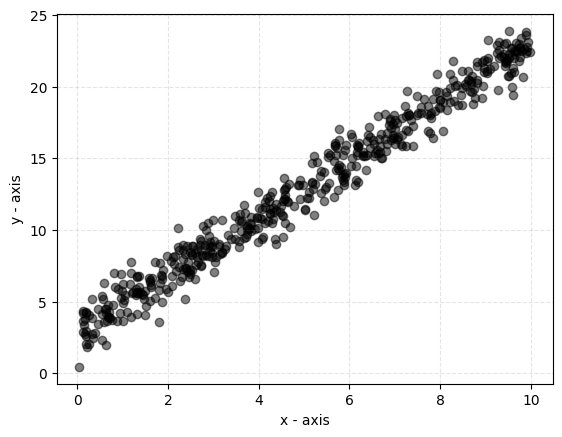

In [3]:
# scatter plot
plt.scatter(X,y, alpha=0.5, color='black')
plt.xlabel("x - axis")
plt.ylabel("y - axis")
plt.grid(True, ls='--', alpha=0.2, color='grey')
plt.show()

#### 3. Feature Engineering 

In [4]:
from torch.utils.data import random_split

In [5]:
# PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

In [6]:
X_tensor[:5]

tensor([[5.4881],
        [7.1519],
        [6.0276],
        [5.4488],
        [4.2365]])

In [7]:
y_tensor[:5]

tensor([[12.9908],
        [15.8320],
        [16.7034],
        [14.0619],
        [12.0404]])

In [8]:
f"{X_tensor.ndim} Dimensional, {y_tensor.ndim} Dimensional"

'2 Dimensional, 2 Dimensional'

In [9]:
X_tensor.shape, y_tensor.shape

(torch.Size([500, 1]), torch.Size([500, 1]))

In [10]:
# splitting data into train and test, where 80 percent train and 20 percent test
train_size = int(0.8 * len(X_tensor))
test_size = len(X_tensor) - train_size

train_dataset, test_dataset = random_split(
    list(zip(X_tensor, y_tensor)), [train_size, test_size]
)

X_train = torch.stack([x[0] for x in train_dataset])
y_train = torch.stack([x[1] for x in train_dataset])
X_test = torch.stack([x[0] for x in test_dataset])
y_test = torch.stack([x[1] for x in test_dataset])

#### 4. Creating Model for Regression Analysis 

In [11]:
class Regression(nn.Module):
    def __init__(self, input_size, output_size):
        nn.Module.__init__(self) 
        self.linear = nn.Linear(input_size, output_size)
    
    def forward(self, x):
        return self.linear(x)

#### 5. Training Model 

In [12]:
input_size = 1  
output_size = 1 
model = Regression(input_size, output_size)

criterion = nn.MSELoss()
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

num_epochs = 50
train_loss_values = []  
test_loss_values = []   

for epoch in range(num_epochs):
    # zero the gradients
    optimizer.zero_grad()

    # forward pass, compute predicted y by passing X to the model
    y_train_pred = model(X_train)

    # compute loss
    train_loss = criterion(y_train_pred, y_train)
    
    # backward pass, compute gradient of the loss with respect to model parameters
    train_loss.backward()

    # update model parameters
    optimizer.step()

    # record the training loss
    train_loss_values.append(train_loss.item())

    # compute and record the test loss
    with torch.no_grad():
        y_test_pred = model(X_test)
        test_loss = criterion(y_test_pred, y_test)
        test_loss_values.append(test_loss.item())

    if (epoch+1) % 5 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {train_loss.item():.4f}, Test Loss: {test_loss.item():.4f}')


Epoch [5/50], Training Loss: 2.8187, Test Loss: 2.6171
Epoch [10/50], Training Loss: 2.7150, Test Loss: 2.5227
Epoch [15/50], Training Loss: 2.6318, Test Loss: 2.4388
Epoch [20/50], Training Loss: 2.5525, Test Loss: 2.3590
Epoch [25/50], Training Loss: 2.4771, Test Loss: 2.2833
Epoch [30/50], Training Loss: 2.4052, Test Loss: 2.2114
Epoch [35/50], Training Loss: 2.3368, Test Loss: 2.1430
Epoch [40/50], Training Loss: 2.2717, Test Loss: 2.0782
Epoch [45/50], Training Loss: 2.2098, Test Loss: 2.0165
Epoch [50/50], Training Loss: 2.1508, Test Loss: 1.9580


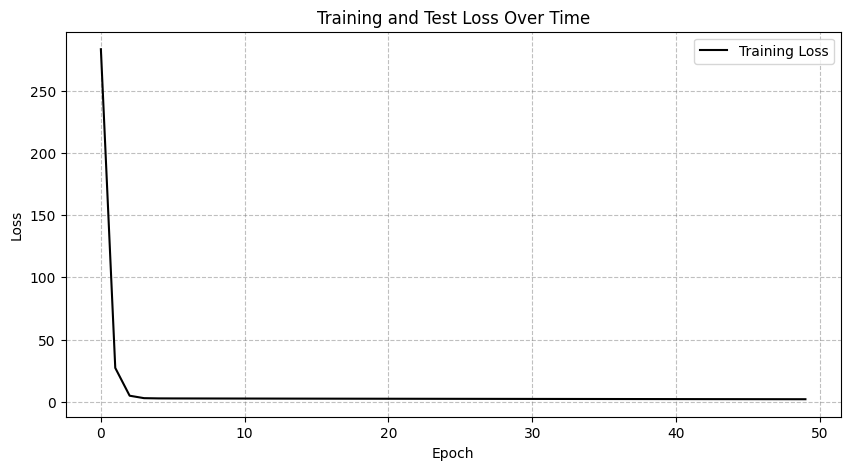

In [13]:
plt.figure(figsize=(10, 5))
plt.plot(train_loss_values, label='Training Loss', color='black')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Over Time')
plt.grid(True, ls='--', alpha=0.5, color='grey')
plt.legend()
plt.show()

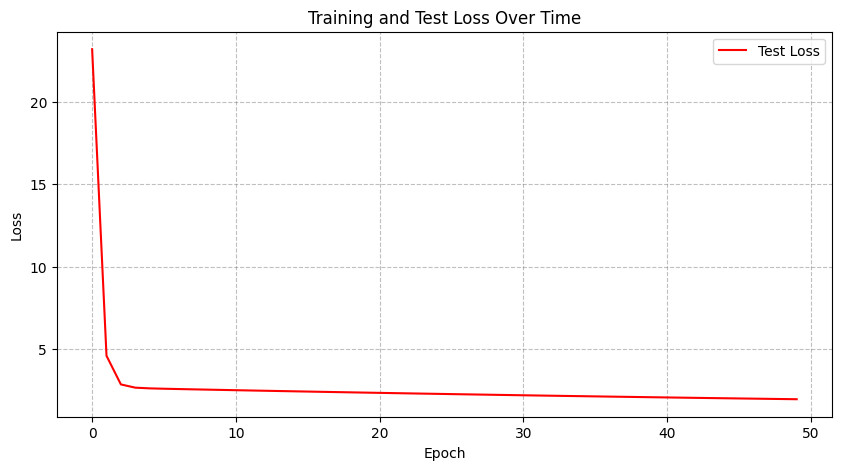

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(test_loss_values, label='Test Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Over Time')
plt.grid(True, ls='--', alpha=0.5, color='grey')
plt.legend()
plt.show()

#### 5. Model Evaluation 

In [15]:
with torch.no_grad():
    # predictions for training and test set
    y_train_pred = model(X_train)
    y_test_pred = model(X_test)

    # metrics for training set
    train_mse = criterion(y_train_pred, y_train)
    train_rmse = torch.sqrt(train_mse)
    train_mae = torch.mean(torch.abs(y_train_pred - y_train))
    train_total_var = ((y_train - y_train.mean()) ** 2).sum()
    train_unexplained_var = ((y_train - y_train_pred) ** 2).sum()
    train_r_squared = 1 - train_unexplained_var / train_total_var

    # metrics for test set
    test_mse = criterion(y_test_pred, y_test)
    test_rmse = torch.sqrt(test_mse)
    test_mae = torch.mean(torch.abs(y_test_pred - y_test))
    test_total_var = ((y_test - y_test.mean()) ** 2).sum()
    test_unexplained_var = ((y_test - y_test_pred) ** 2).sum()
    test_r_squared = 1 - test_unexplained_var / test_total_var

# final metrics for both train and test sets
print(f'Final Train Metrics: MSE: {train_mse:.4f}, RMSE: {train_rmse:.4f}, MAE: {train_mae:.4f}, R^2: {train_r_squared:.4f}')
print(f'Final Test Metrics: MSE: {test_mse:.4f}, RMSE: {test_rmse:.4f}, MAE: {test_mae:.4f}, R^2: {test_r_squared:.4f}')

Final Train Metrics: MSE: 2.1393, RMSE: 1.4626, MAE: 1.1614, R^2: 0.9399
Final Test Metrics: MSE: 1.9580, RMSE: 1.3993, MAE: 1.1656, R^2: 0.9377


#### 6. Cross Validation 

In [16]:
from sklearn.model_selection import KFold

In [17]:
# five number of folds
k = 5
kf = KFold(n_splits=k)

# R-squared for each fold
train_r_squared_values = []
test_r_squared_values = []

for train_index, test_index in kf.split(X_tensor):
    X_train_fold, X_test_fold = X_tensor[train_index], X_tensor[test_index]
    y_train_fold, y_test_fold = y_tensor[train_index], y_tensor[test_index]
    # predictions
    y_train_pred_fold = model(X_train_fold)
    y_test_pred_fold = model(X_test_fold)
    # R-squared for train and test sets
    train_total_var = ((y_train_fold - y_train_fold.mean()) ** 2).sum()
    train_unexplained_var = ((y_train_fold - y_train_pred_fold) ** 2).sum()
    train_r_squared = 1 - train_unexplained_var / train_total_var
    train_r_squared_values.append(train_r_squared.item())
    
    test_total_var = ((y_test_fold - y_test_fold.mean()) ** 2).sum()
    test_unexplained_var = ((y_test_fold - y_test_pred_fold) ** 2).sum()
    test_r_squared = 1 - test_unexplained_var / test_total_var
    test_r_squared_values.append(test_r_squared.item())

In [18]:
print("Train R Square KFold: ")
for i, j in enumerate(train_r_squared_values):
    print(f'K Fold {i+1} : R Square {j:4f}')

Train R Square KFold: 
K Fold 1 : R Square 0.940804
K Fold 2 : R Square 0.941198
K Fold 3 : R Square 0.940007
K Fold 4 : R Square 0.942597
K Fold 5 : R Square 0.935087


In [19]:
print("Test R Square KFold: ")
for i, j in enumerate(test_r_squared_values):
    print(f'K Fold {i+1} : R Square {j:4f}')

Test R Square KFold: 
K Fold 1 : R Square 0.936399
K Fold 2 : R Square 0.933619
K Fold 3 : R Square 0.939888
K Fold 4 : R Square 0.928338
K Fold 5 : R Square 0.957165


In [20]:
# average R-squared across all folds
avg_train_r_squared = np.mean(train_r_squared_values)
avg_test_r_squared = np.mean(test_r_squared_values)

print(f'Average Train R-squared: {avg_train_r_squared:.4f}')
print(f'Average Test R-squared: {avg_test_r_squared:.4f}')

Average Train R-squared: 0.9399
Average Test R-squared: 0.9391


#### 7. Predictions 

In [21]:
predicted = model(X_test).detach().numpy()
predicted[:5]

array([[19.331793 ],
       [10.917944 ],
       [ 2.3413131],
       [13.965647 ],
       [ 3.8544254]], dtype=float32)

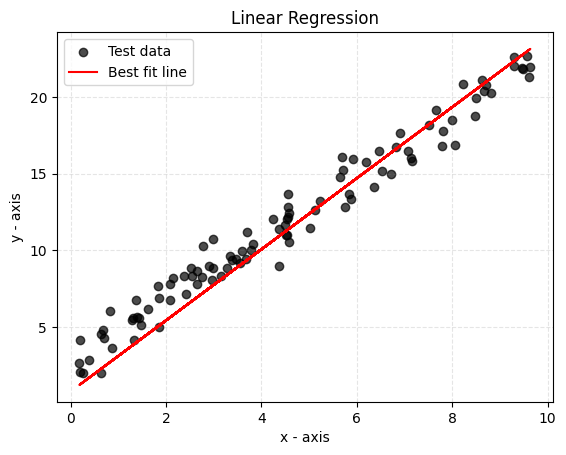

In [22]:
plt.scatter(X_test, y_test, label='Test data', color='black', alpha=0.7)
plt.plot(X_test, predicted, color='red', label='Best fit line')
plt.xlabel("x - axis")
plt.ylabel("y - axis")
plt.title('Linear Regression')
plt.grid(True, ls='--', alpha=0.2, color='grey')
plt.legend()
plt.show()

#### References

- [PyTorch Official Website](https://pytorch.org/)
- [PyTorch GitHub Repository](https://github.com/pytorch/pytorch)
- [Linear Regression with PyTorch - Towards Data Science](https://towardsdatascience.com/linear-regression-with-pytorch-eb6dedead817)
- [Training a Linear Regression Model in PyTorch - Machine Learning Mastery](https://machinelearningmastery.com/training-a-linear-regression-model-in-pytorch/)
